In [1]:
!unzip /content/fer2013.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("train/angry/Training_3908.jpg")

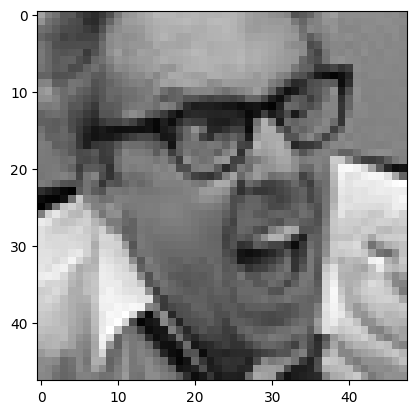

In [3]:
plt.imshow(img_array)

In [4]:
dataDirectory = "train/"
dataDirectoryTest = "test/"

categories = ["angry","disgust","fear","happy","neutral","sad","surprise"]

img_size = 224

trainingData = []
testData = []

In [5]:
for category in categories:
  path = os.path.join(dataDirectory, category)
  class_num = categories.index(category)
  count = 0
  for img in os.listdir(path):
    try:
      if count == 1500:
        break
      img_array = cv2.imread(os.path.join(path,img))
      new_array= cv2.resize(img_array,(img_size,img_size))
      trainingData.append([new_array,class_num])

      count += 1
    except Exception as e:
      pass

In [6]:
len(trainingData)

9436

In [7]:
for category in categories:
  path = os.path.join(dataDirectoryTest, category)
  class_num = categories.index(category)
  count = 0
  for img in os.listdir(path):
    try:
      img_array = cv2.imread(os.path.join(path,img))
      new_array= cv2.resize(img_array,(img_size,img_size))
      testData.append([new_array,class_num])

      count += 1
    except Exception as e:
      pass

In [8]:
len(testData)

7178

In [9]:
import random

In [10]:
random.shuffle(trainingData)
random.shuffle(testData)

In [11]:
x = []
y = []

x_test = []
y_test = []

for features, label in trainingData:
    x.append(features)
    y.append(label)

for features, label in testData:
    x_test.append(features)
    y_test.append(label)

In [12]:
x = np.array(x).reshape(-1, img_size, img_size, 3)
x_test = np.array(x_test).reshape(-1, img_size, img_size, 3)

x=x/255.0
x_test = x_test/255.0

y = np.array(y)
y_test = np.array(y_test)

In [13]:
x.shape

(9436, 224, 224, 3)

In [14]:
y.shape

(9436,)

In [15]:
x_test.shape

(7178, 224, 224, 3)

In [16]:
y_test.shape

(7178,)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.MobileNetV2()

In [19]:
base_input = model.layers[0].input

In [20]:
base_output = model.layers[-2].output

In [21]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [22]:
final_output = layers.Dense(128)(base_output)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_ouput)
final_ouput = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_ouput)

In [23]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [24]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [25]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [26]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"] )

In [27]:
new_model.fit(x,y, epochs = 200)

Epoch 1/200
295/295 [==============================] - 50s 57ms/step - loss: 1.4850 - accuracy: 0.4279
Epoch 2/200
295/295 [==============================] - 16s 56ms/step - loss: 1.2565 - accuracy: 0.5145
Epoch 3/200
295/295 [==============================] - 16s 56ms/step - loss: 1.1475 - accuracy: 0.5708
Epoch 4/200
295/295 [==============================] - 16s 56ms/step - loss: 1.0544 - accuracy: 0.6041
Epoch 5/200
295/295 [==============================] - 17s 56ms/step - loss: 0.9827 - accuracy: 0.6313
Epoch 6/200
295/295 [==============================] - 16s 56ms/step - loss: 0.9024 - accuracy: 0.6624
Epoch 7/200
295/295 [==============================] - 17s 56ms/step - loss: 0.8252 - accuracy: 0.6875
Epoch 8/200
295/295 [==============================] - 16s 56ms/step - loss: 0.7613 - accuracy: 0.7213
Epoch 9/200
295/295 [==============================] - 16s 55ms/step - loss: 0.6989 - accuracy: 0.7409
Epoch 10/200
295/295 [==============================] - 16s 56ms/step - l

In [30]:
new_model.save("emotiondetection.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
score = new_model.evaluate(x_test, y_test, verbose=0)

In [29]:
score[1]*100

53.914737701416016